In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [149]:
df = pd.read_csv("./SeoulBikeData.csv", encoding='latin1')

In [151]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [153]:
# replacing the blank spaces with underscore
df.columns = df.columns.str.replace(' ','_')

In [155]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [157]:
df.isnull().sum()

Date                         0
Rented_Bike_Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind_speed_(m/s)             0
Visibility_(10m)             0
Dew_point_temperature(°C)    0
Solar_Radiation_(MJ/m2)      0
Rainfall(mm)                 0
Snowfall_(cm)                0
Seasons                      0
Holiday                      0
Functioning_Day              0
dtype: int64

In [159]:
df.value_counts()

Date        Rented_Bike_Count  Hour  Temperature(°C)  Humidity(%)  Wind_speed_(m/s)  Visibility_(10m)  Dew_point_temperature(°C)  Solar_Radiation_(MJ/m2)  Rainfall(mm)  Snowfall_(cm)  Seasons  Holiday     Functioning_Day
01/01/2018  61                 5     -4.4             54           0.8               1786              -12.3                      0.00                     0.0           0.0            Winter   Holiday     Yes                1
21/04/2018  707                0      16.3            59           0.2               756                8.2                       0.00                     0.0           0.0            Spring   No Holiday  Yes                1
            324                7      12.5            68           1.1               457                6.7                       0.22                     0.0           0.0            Spring   No Holiday  Yes                1
            436                2      14.7            63           1.8               611             

In [161]:
# unique values in 'Rented_Bike_Count'
df['Rented_Bike_Count'].value_counts()

Rented_Bike_Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: count, Length: 2166, dtype: int64

In [163]:
# maximum number of bikes rented in a day
df['Rented_Bike_Count'].max()

3556

In [165]:
# mean and median
print(f"Mean: {df['Rented_Bike_Count'].mean()}")
print(f"Median: {df['Rented_Bike_Count'].median()}")

Mean: 704.6020547945205
Median: 504.5


### Visualizing the relationship between seasons and bike sharing demand

In [180]:
# total bike rented in each seaso
df.groupby('Seasons')['Rented_Bike_Count'].sum()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented_Bike_Count, dtype: int64

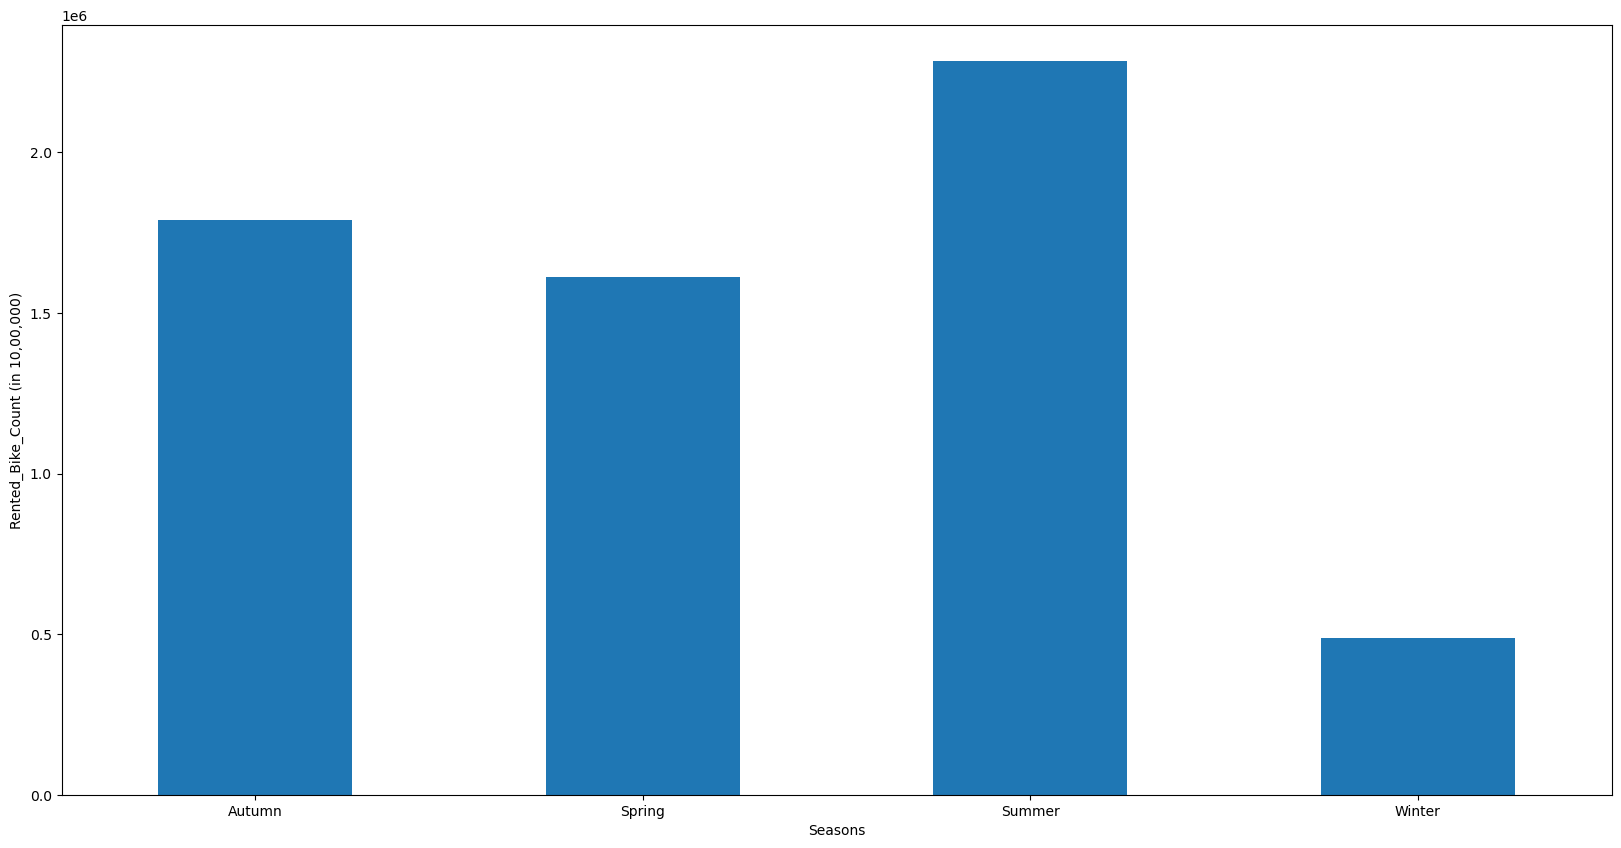

In [212]:
plt.figure(figsize=(20,10))
total_per_season = df.groupby('Seasons')['Rented_Bike_Count'].sum()
total_per_season.plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Rented_Bike_Count (in 10,00,000)')
plt.xticks(rotation=0)

# sns.barplot(x=total_per_season', y='Rented_Bike_Count', data=total_per_season, ax=ax)
plt.show()

### Categorizing the demand of bike sharing into
- low demand (<400)
- moderate demand (>400 && <1000)
- high demand 

In [215]:
def countsplit(df):
    for i in range (8760):
        if df.at[i, 'Rented_Bike_Count']<400:
            df.at[i, 'Rented_Bike_Count']=0
        elif df.at[i, 'Rented_Bike_Count']>1000:
            df.at[i, 'Rented_Bike_Count']=2
        else:
            df.at[i, 'Rented_Bike_Count']=1

countsplit(df)

In [216]:
df['Rented_Bike_Count'].value_counts()

Rented_Bike_Count
0    3902
1    2440
2    2418
Name: count, dtype: int64

### Visualizing the bike demand with temperature

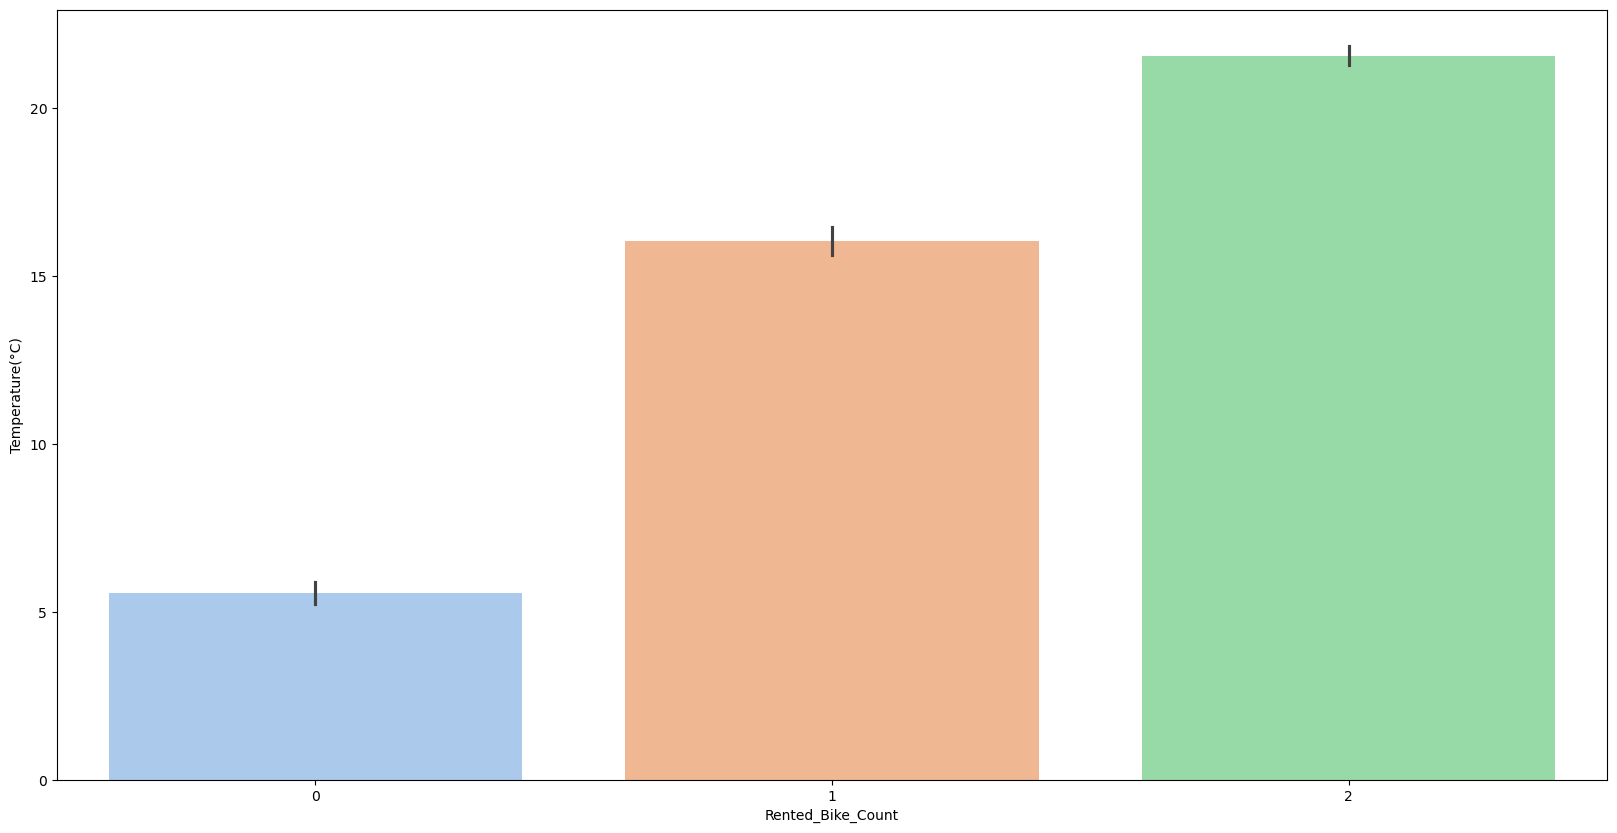

In [220]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Rented_Bike_Count', y='Temperature(°C)', data=df, ax=ax, hue='Rented_Bike_Count', legend=False, palette='pastel')
plt.show()

## Data preprocessing for model creation

In [223]:
encoder = LabelEncoder()

df['Date'] = encoder.fit_transform(df['Date'])
df['Seasons'] = encoder.fit_transform(df['Seasons'])
df['Holiday'] = encoder.fit_transform(df['Holiday'])
df['Functioning_Day'] = encoder.fit_transform(df['Functioning_Day'])

In [225]:
X = df.drop(['Rented_Bike_Count'], axis=1)
y = df['Rented_Bike_Count']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [231]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Random Forest Classifier



In [237]:
rfc = RandomForestClassifier(n_estimators=100)

In [239]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [241]:
rfc.score(X_test, y_test)

0.8245270711024135

#### SVM (Support Vector Machine)

In [245]:
sv = SVC()

In [247]:
sv = SVC()

In [249]:
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.766470971950424